In [1]:
import random
import os
import glob
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import keras 
import gzip
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
import matplotlib.pyplot as plt

os.chdir('../../functions/')
from models import get_class_weight, preprocessor, plot_confusion_matrix, compile_image_model, \
                    CNN_model,label_dict, revlabel_dict, recreate_labels, map_path_to_augmented


from preprocessing import create_data_set, randomize


In [2]:
DATA_DIR = "../../archive-2/"
large_labels = ["hole", "thread_error", "objects", "oil_spot"]

#walk all the files and add them to this
all_files = [filename for filename in glob.glob(DATA_DIR + "//*//*")]
all_files = [filename for filename in all_files if 'good' not in filename and 'tilda' not in filename 
             and filename.split("/")[3] in large_labels]

#shuffle
random.shuffle(all_files)

#get class names
all_labels = [filename.split("/")[-2] for filename in all_files]
all_labels_numerical = [revlabel_dict[filename.split("/")[-2]] for filename in all_files]


In [3]:
features_train_defect_array, features_eval_defect_array, \
features_test_defect_array, labels_defect_train, \
labels_defect_eval, labels_defect_test = create_data_set(all_files, all_labels_numerical, 
                                                         label_dict, revlabel_dict, 
                                                         target_samples_per_class_train = 10240, 
                                                         target_samples_per_class_eval = 1024, 
                                                         label_code=1, random_state=102)

1944 243 243
1944 243 243
unique_labels {'thread_error', 'oil_spot', 'objects', 'hole'}
unique_labels {'thread_error', 'oil_spot', 'objects', 'hole'}
40868 4094 243
len(features_train_array): 40868
features_train_array.shape: (40868, 64, 64, 3)
features_test_array.shape: (243, 64, 64, 3)
features_train_array.shape: (40868, 64, 64, 1)
features_test_array.shape: (243, 64, 64, 1)


In [4]:
class_weights = get_class_weight(list(labels_defect_train))
class_weights

9.950248756218905e-05
9.782821365681862e-05
9.823182711198428e-05
9.600614439324117e-05


{0: 9.950248756218905e-05,
 1: 9.782821365681862e-05,
 2: 9.823182711198428e-05,
 3: 9.600614439324117e-05}

In [5]:
labels_defect_train = np.array(labels_defect_train)
labels_defect_eval = np.array(labels_defect_eval)
labels_defect_test = np.array(labels_defect_test)

NEW MODEL
kernel dim = 3x3 number kernels = 2, 7x7 number kernels = 12
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 431,424 (1.65 MB)

 Trainable params: 430,976 (1.64 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 61s 371ms/step - accuracy: 0.2762 - loss: 1.4943e-04 - val_accuracy: 0.2433 - val_loss: 1.4380
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - accuracy: 0.3447 - loss: 1.3023e-04 - val_accuracy: 0.2428 - val_loss: 1.6011
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 369ms/step - accuracy: 0.3830 - loss: 1.2480e-04 - val_accuracy: 0.2628 - val_loss: 1.9002
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 373ms/step - accuracy: 0.4353 - loss: 1.1825e-04 - val_accuracy: 0.2665 - val_loss: 2.1677
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 369ms/step - accuracy: 0.4814 - loss: 1.1201e-04 - val_accuracy: 0.2723 - val_loss: 2.3276
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 372ms/step - accuracy: 0.5194 - loss: 1.0533e-04 - val_accuracy: 0.2741 - val_loss: 2.3560
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 395ms/step - accuracy: 0.5795 - loss: 9.5616e-05 - val_accuracy: 0.2599 - val_loss: 2.1316
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 1,293,378 (4.93 MB)

 Trainable params: 430,976 (1.64 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 861,954 (3.29 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Finished predicting X with eval data set.

[[360 120 150 390]
 [ 12 672  72 240]
 [  0 176 640 208]
 [ 34 238  85 697]]
sum of diagonal = 2369


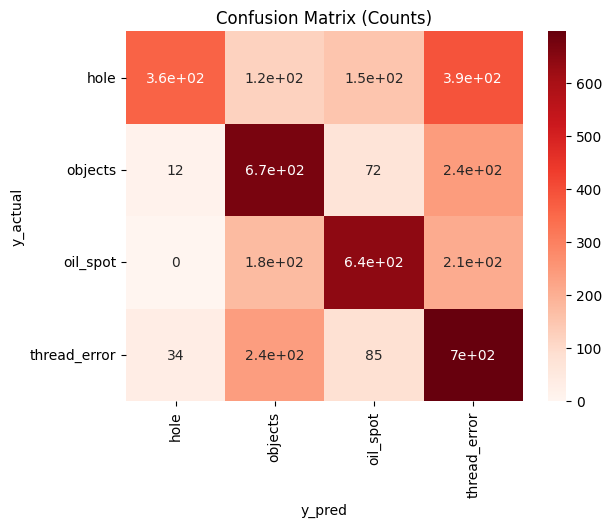


[[0.08793356 0.02931119 0.03663898 0.09526136]
 [0.00293112 0.16414265 0.01758671 0.05862237]
 [0.         0.04298974 0.15632633 0.05080606]
 [0.00830484 0.05813385 0.02076209 0.17024915]]
sum of diagonal = 0.5786516853932584


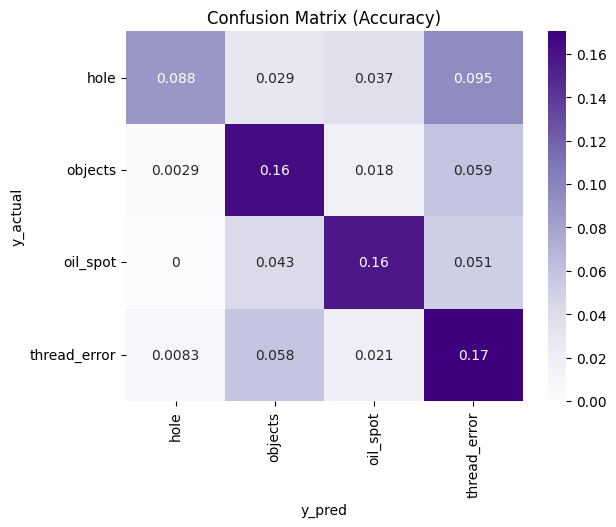


[[0.88669951 0.09950249 0.15839493 0.25407166]
 [0.02955665 0.55721393 0.07602957 0.15635179]
 [0.         0.14593698 0.67581837 0.13550489]
 [0.08374384 0.1973466  0.08975713 0.45407166]]
sum of diagonal = 2.5738034727872443



[[0.35294118 0.11764706 0.14705882 0.38235294]
 [0.01204819 0.6746988  0.07228916 0.24096386]
 [0.         0.171875   0.625      0.203125  ]
 [0.03225806 0.22580645 0.08064516 0.66129032]]
sum of diagonal = 2.313930294231956


kernel dim = 3x3 number filter = 2, 7x7 number filter = 12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Finished predicting X.

[[ 9  5  3 17]
 [ 1 58  6 19]
 [ 1 11 39 12]
 [ 2 11 10 39]]
sum of diagonal = 145



[[0.03703704 0.02057613 0.01234568 0.06995885]
 [0.00411523 0.23868313 0.02469136 0.0781893 ]
 [0.00411523 0.04526749 0.16049383 0.04938272]
 [0.00823045 0.04526749 0.04115226 0.16049383]]
sum of diagonal = 0.5967078189300411


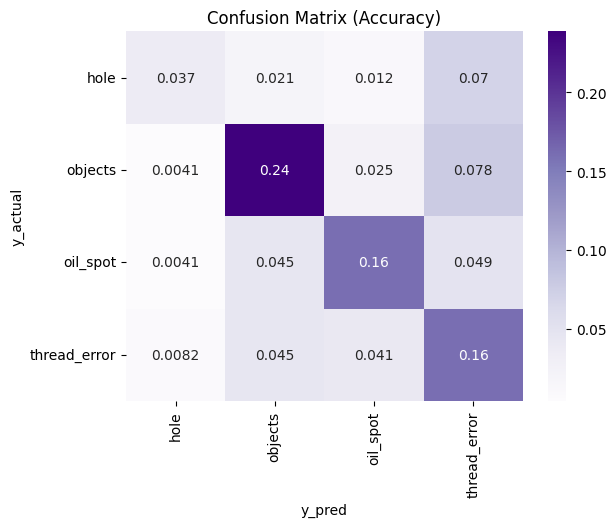


[[0.69230769 0.05882353 0.05172414 0.1954023 ]
 [0.07692308 0.68235294 0.10344828 0.2183908 ]
 [0.07692308 0.12941176 0.67241379 0.13793103]
 [0.15384615 0.12941176 0.17241379 0.44827586]]
sum of diagonal = 2.495350288656577


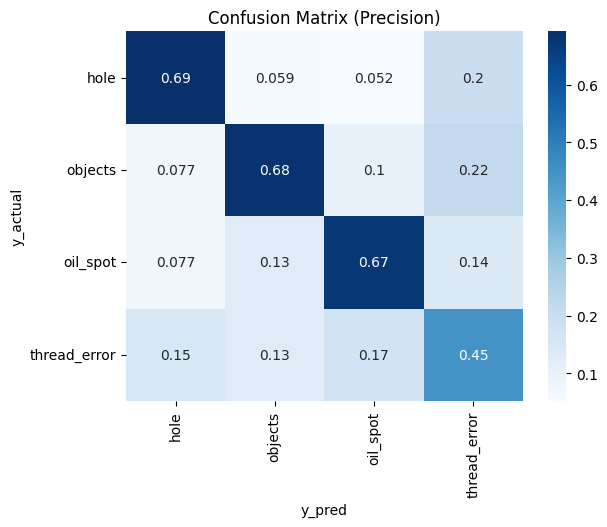


[[0.26470588 0.14705882 0.08823529 0.5       ]
 [0.01190476 0.69047619 0.07142857 0.22619048]
 [0.01587302 0.17460317 0.61904762 0.19047619]
 [0.03225806 0.17741935 0.16129032 0.62903226]]
sum of diagonal = 2.203261949941267


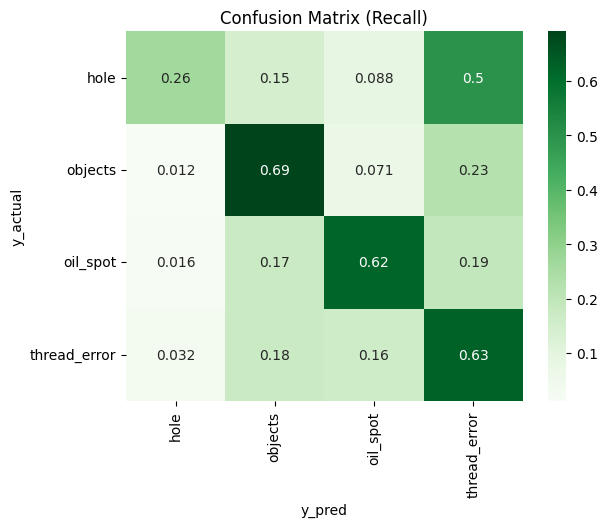

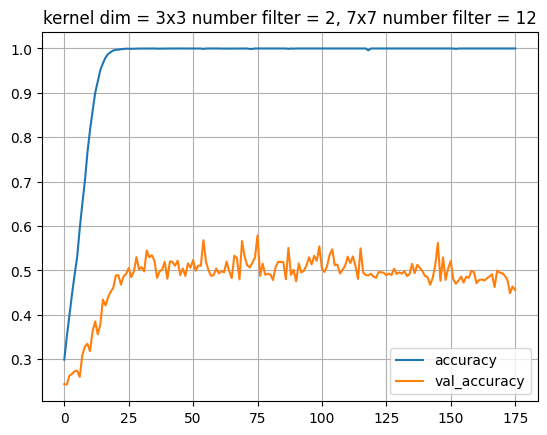

NEW MODEL
kernel dim = 3x3 number kernels = 2, 7x7 number kernels = 14
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 508,216 (1.94 MB)

 Trainable params: 507,768 (1.94 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 482ms/step - accuracy: 0.2900 - loss: 1.4470e-04 - val_accuracy: 0.2574 - val_loss: 1.4236
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 479ms/step - accuracy: 0.3458 - loss: 1.2985e-04 - val_accuracy: 0.2528 - val_loss: 1.6013
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 489ms/step - accuracy: 0.3926 - loss: 1.2360e-04 - val_accuracy: 0.2364 - val_loss: 1.8189
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 481ms/step - accuracy: 0.4748 - loss: 1.1308e-04 - val_accuracy: 0.2413 - val_loss: 1.9256
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 481ms/step - accuracy: 0.5606 - loss: 9.9511e-05 - val_accuracy: 0.3000 - val_loss: 1.8949
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 485ms/step - accuracy: 0.6195 - loss: 8.9626e-05 - val_accuracy: 0.3219 - val_loss: 1.8458
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 78s 489ms/step - accuracy: 0.6719 - loss: 8.0277e-05 - val_accuracy: 0.3031 - val_loss: 1.9254
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 1,523,754 (5.81 MB)

 Trainable params: 507,768 (1.94 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,015,538 (3.87 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Finished predicting X with eval data set.

[[540  90 150 240]
 [ 12 552 312 120]
 [  0 144 784  96]
 [ 68 204 306 476]]
sum of diagonal = 2352


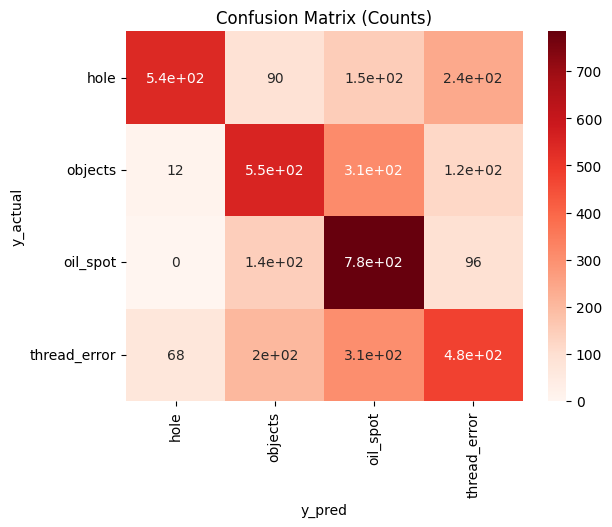


[[0.13190034 0.02198339 0.03663898 0.05862237]
 [0.00293112 0.13483146 0.07620909 0.02931119]
 [0.         0.03517342 0.19149976 0.02344895]
 [0.01660967 0.04982902 0.07474353 0.11626771]]
sum of diagonal = 0.5744992672203224



[[0.87096774 0.09090909 0.09664948 0.25751073]
 [0.01935484 0.55757576 0.20103093 0.12875536]
 [0.         0.14545455 0.50515464 0.10300429]
 [0.10967742 0.20606061 0.19716495 0.51072961]]
sum of diagonal = 2.4444277524204048



[[0.52941176 0.08823529 0.14705882 0.23529412]
 [0.01204819 0.55421687 0.31325301 0.12048193]
 [0.         0.140625   0.765625   0.09375   ]
 [0.06451613 0.19354839 0.29032258 0.4516129 ]]
sum of diagonal = 2.3008665354015685


kernel dim = 3x3 number filter = 2, 7x7 number filter = 14
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Finished predicting X.

[[16  6  7  5]
 [ 3 46 22 13]
 [ 1  7 48  7]
 [ 7 13 21 21]]
sum of diagonal = 131



[[0.06584362 0.02469136 0.02880658 0.02057613]
 [0.01234568 0.18930041 0.09053498 0.05349794]
 [0.00411523 0.02880658 0.19753086 0.02880658]
 [0.02880658 0.05349794 0.08641975 0.08641975]]
sum of diagonal = 0.5390946502057613



[[0.59259259 0.08333333 0.07142857 0.10869565]
 [0.11111111 0.63888889 0.2244898  0.2826087 ]
 [0.03703704 0.09722222 0.48979592 0.15217391]
 [0.25925926 0.18055556 0.21428571 0.45652174]]
sum of diagonal = 2.177799138979263


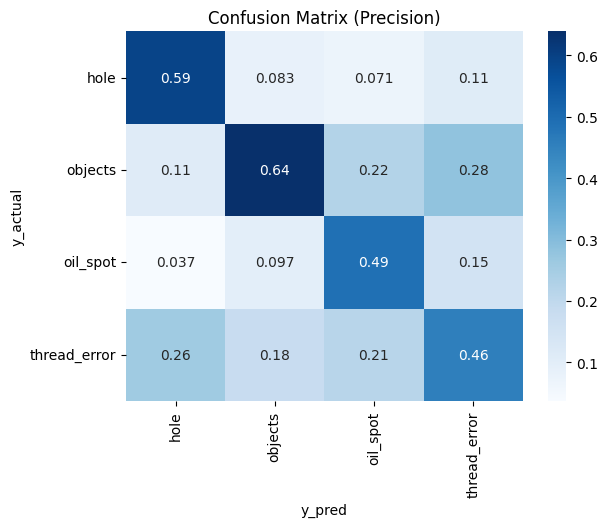


[[0.47058824 0.17647059 0.20588235 0.14705882]
 [0.03571429 0.54761905 0.26190476 0.1547619 ]
 [0.01587302 0.11111111 0.76190476 0.11111111]
 [0.11290323 0.20967742 0.33870968 0.33870968]]
sum of diagonal = 2.118821722237282


NEW MODEL
kernel dim = 3x3 number kernels = 4, 7x7 number kernels = 12
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 483,736 (1.85 MB)

 Trainable params: 483,288 (1.84 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 396ms/step - accuracy: 0.2892 - loss: 1.4142e-04 - val_accuracy: 0.2433 - val_loss: 3.0204
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 392ms/step - accuracy: 0.3643 - loss: 1.2864e-04 - val_accuracy: 0.2433 - val_loss: 3.3996
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 395ms/step - accuracy: 0.4147 - loss: 1.2165e-04 - val_accuracy: 0.2787 - val_loss: 2.7269
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 394ms/step - accuracy: 0.4771 - loss: 1.1203e-04 - val_accuracy: 0.2658 - val_loss: 2.4803
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 393ms/step - accuracy: 0.5348 - loss: 1.0286e-04 - val_accuracy: 0.3012 - val_loss: 2.2680
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 395ms/step - accuracy: 0.5962 - loss: 9.0797e-05 - val_accuracy: 0.2907 - val_loss: 2.3050
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 393ms/step - accuracy: 0.6710 - loss: 7.7059e-05 - val_accuracy: 0.2775 - val_loss: 2.4488
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 1,450,314 (5.53 MB)

 Trainable params: 483,288 (1.84 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 966,578 (3.69 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Finished predicting X with eval data set.

[[240 300  90 390]
 [ 36 624 180 156]
 [  0 208 624 192]
 [ 17 187 102 748]]
sum of diagonal = 2236



[[0.05862237 0.07327797 0.02198339 0.09526136]
 [0.00879336 0.15241817 0.04396678 0.03810454]
 [0.         0.05080606 0.15241817 0.0468979 ]
 [0.00415242 0.0456766  0.02491451 0.1827064 ]]
sum of diagonal = 0.5461651196873474


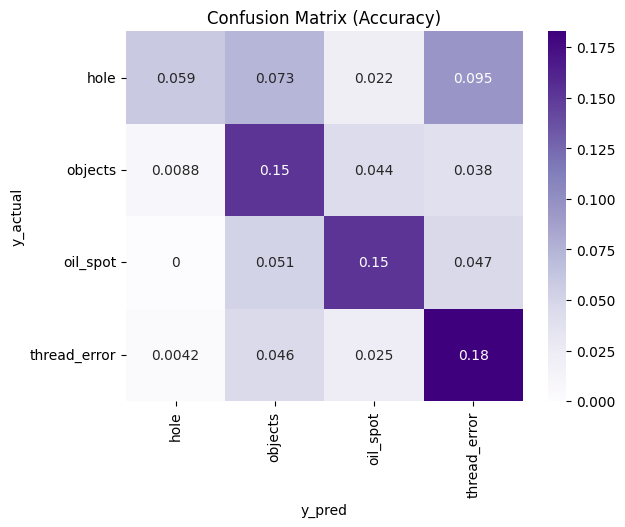


[[0.81911263 0.22744503 0.09036145 0.26244953]
 [0.12286689 0.47308567 0.18072289 0.10497981]
 [0.         0.15769522 0.62650602 0.12920592]
 [0.05802048 0.14177407 0.10240964 0.50336474]]
sum of diagonal = 2.4220690605960553


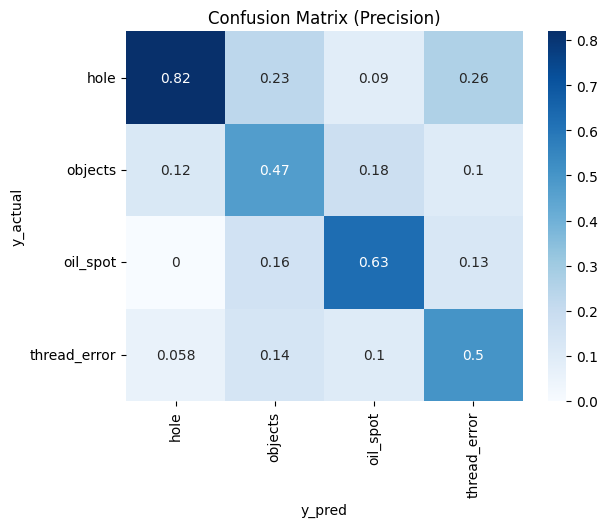


[[0.23529412 0.29411765 0.08823529 0.38235294]
 [0.03614458 0.62650602 0.18072289 0.15662651]
 [0.         0.203125   0.609375   0.1875    ]
 [0.01612903 0.17741935 0.09677419 0.70967742]]
sum of diagonal = 2.180852561098283


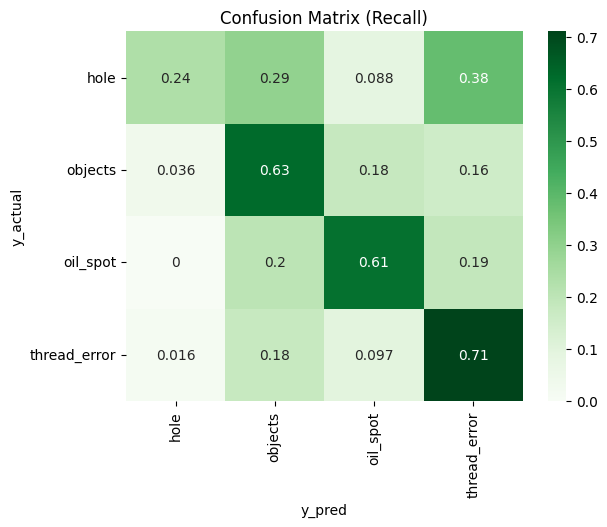

kernel dim = 3x3 number filter = 4, 7x7 number filter = 12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Finished predicting X.

[[ 8 10  3 13]
 [ 1 58 15 10]
 [ 0 18 28 17]
 [ 0 11 13 38]]
sum of diagonal = 132


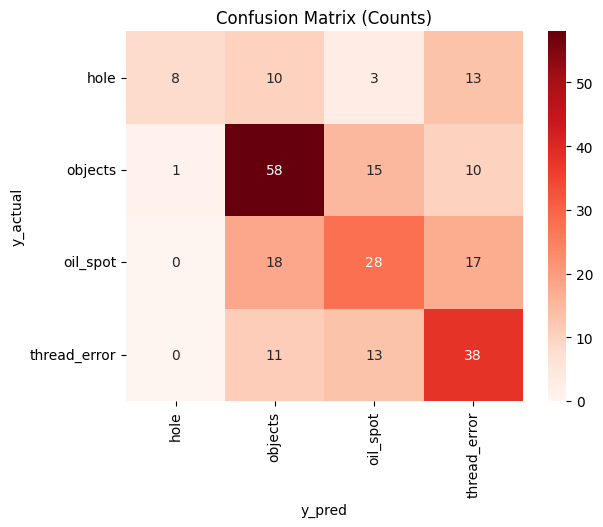


[[0.03292181 0.04115226 0.01234568 0.05349794]
 [0.00411523 0.23868313 0.0617284  0.04115226]
 [0.         0.07407407 0.11522634 0.06995885]
 [0.         0.04526749 0.05349794 0.1563786 ]]
sum of diagonal = 0.5432098765432098


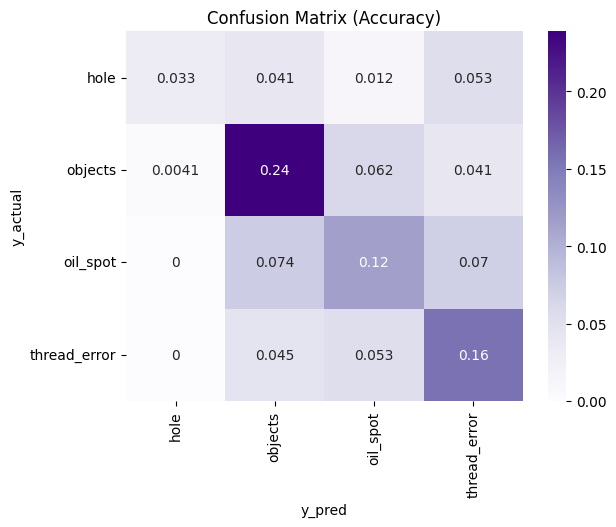


[[0.88888889 0.10309278 0.05084746 0.16666667]
 [0.11111111 0.59793814 0.25423729 0.12820513]
 [0.         0.18556701 0.47457627 0.21794872]
 [0.         0.11340206 0.22033898 0.48717949]]
sum of diagonal = 2.448582791584714


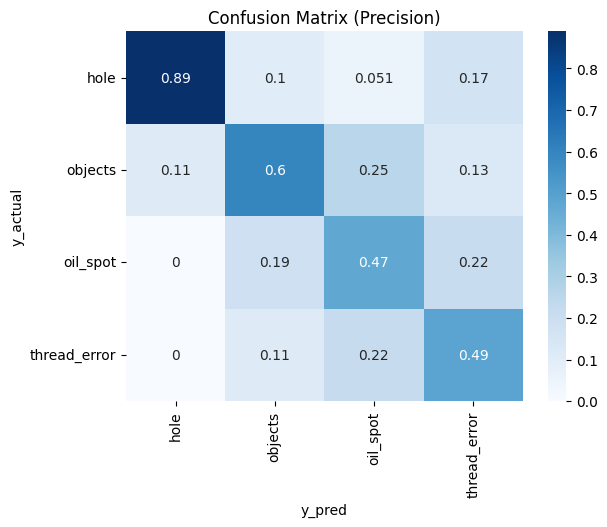


[[0.23529412 0.29411765 0.08823529 0.38235294]
 [0.01190476 0.69047619 0.17857143 0.11904762]
 [0.         0.28571429 0.44444444 0.26984127]
 [0.         0.17741935 0.20967742 0.61290323]]
sum of diagonal = 1.9831179783741453


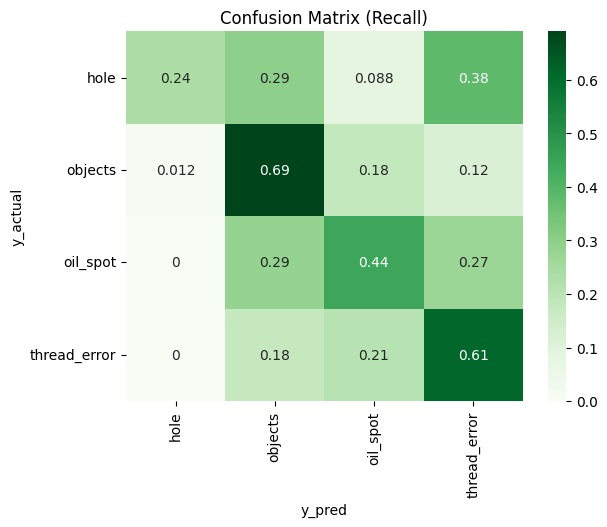

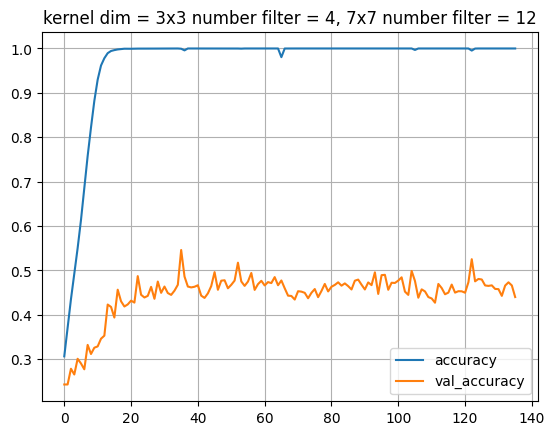

NEW MODEL
kernel dim = 3x3 number kernels = 4, 7x7 number kernels = 14
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 560,528 (2.14 MB)

 Trainable params: 560,080 (2.14 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 82s 507ms/step - accuracy: 0.2629 - loss: 1.5665e-04 - val_accuracy: 0.2433 - val_loss: 1.4681
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 502ms/step - accuracy: 0.3287 - loss: 1.3256e-04 - val_accuracy: 0.2750 - val_loss: 1.6232
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 502ms/step - accuracy: 0.3744 - loss: 1.2614e-04 - val_accuracy: 0.2281 - val_loss: 1.7153
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 500ms/step - accuracy: 0.4321 - loss: 1.1817e-04 - val_accuracy: 0.2443 - val_loss: 1.9903
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 500ms/step - accuracy: 0.4791 - loss: 1.1155e-04 - val_accuracy: 0.2526 - val_loss: 2.0839
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 499ms/step - accuracy: 0.5308 - loss: 1.0331e-04 - val_accuracy: 0.2919 - val_loss: 1.9327
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 500ms/step - accuracy: 0.5868 - loss: 9.3432e-05 - val_accuracy: 0.2665 - val_loss: 2.0875
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 1,680,690 (6.41 MB)

 Trainable params: 560,080 (2.14 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,120,162 (4.27 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Finished predicting X with eval data set.

[[480  60 210 270]
 [ 48 564 228 156]
 [ 16 176 688 144]
 [ 85 204 289 476]]
sum of diagonal = 2208


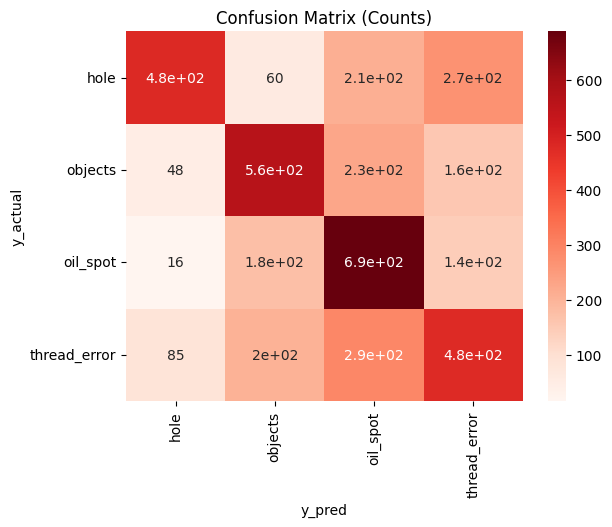


[[0.11724475 0.01465559 0.05129458 0.06595017]
 [0.01172447 0.13776258 0.05569126 0.03810454]
 [0.00390816 0.04298974 0.16805081 0.03517342]
 [0.02076209 0.04982902 0.07059111 0.11626771]]
sum of diagonal = 0.5393258426966292


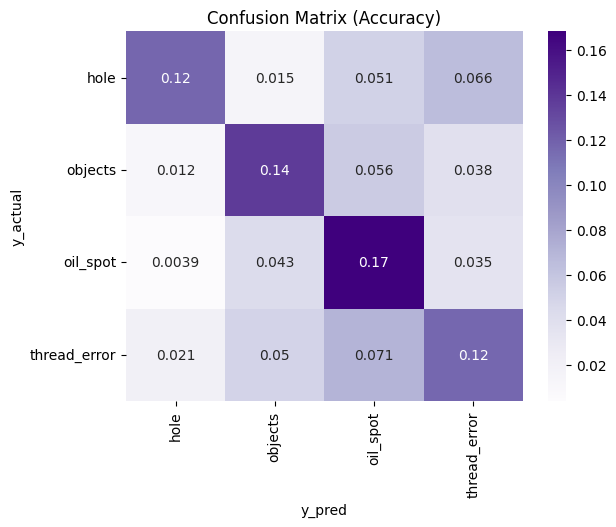


[[0.76311606 0.05976096 0.14840989 0.2581262 ]
 [0.07631161 0.56175299 0.16113074 0.14913958]
 [0.0254372  0.1752988  0.48621908 0.1376673 ]
 [0.13513514 0.20318725 0.20424028 0.45506692]]
sum of diagonal = 2.2661550481597166


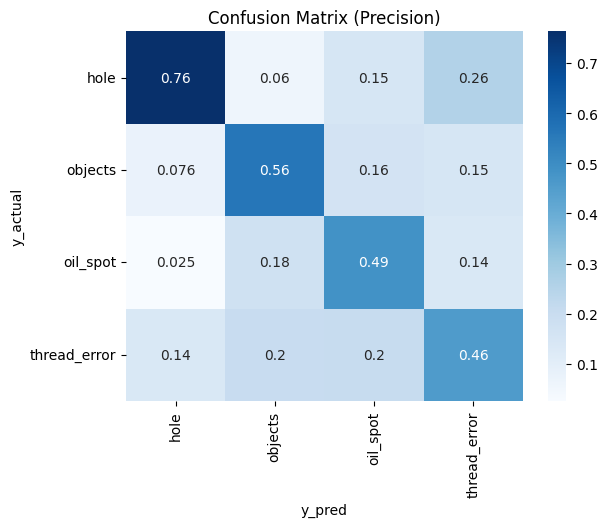


[[0.47058824 0.05882353 0.20588235 0.26470588]
 [0.04819277 0.56626506 0.22891566 0.15662651]
 [0.015625   0.171875   0.671875   0.140625  ]
 [0.08064516 0.19354839 0.27419355 0.4516129 ]]
sum of diagonal = 2.160341198760888


kernel dim = 3x3 number filter = 4, 7x7 number filter = 14
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Finished predicting X.

[[16  4  9  5]
 [ 2 45 24 13]
 [ 1  7 49  6]
 [ 7  7 25 23]]
sum of diagonal = 133



[[0.06584362 0.01646091 0.03703704 0.02057613]
 [0.00823045 0.18518519 0.09876543 0.05349794]
 [0.00411523 0.02880658 0.20164609 0.02469136]
 [0.02880658 0.02880658 0.10288066 0.09465021]]
sum of diagonal = 0.5473251028806584


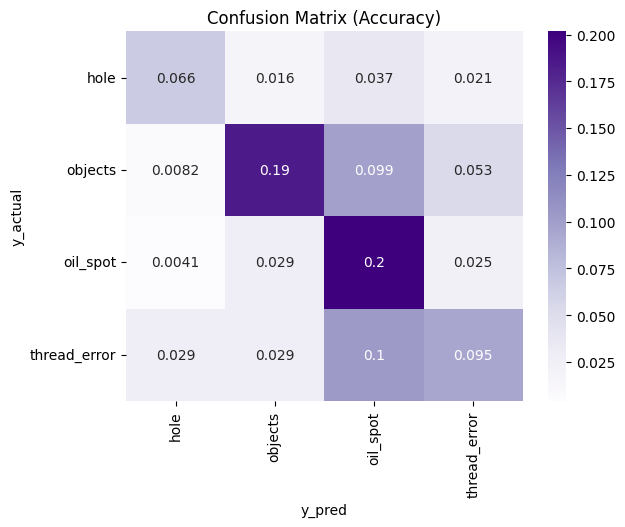


[[0.61538462 0.06349206 0.08411215 0.10638298]
 [0.07692308 0.71428571 0.22429907 0.27659574]
 [0.03846154 0.11111111 0.45794393 0.12765957]
 [0.26923077 0.11111111 0.23364486 0.4893617 ]]
sum of diagonal = 2.276975957031634


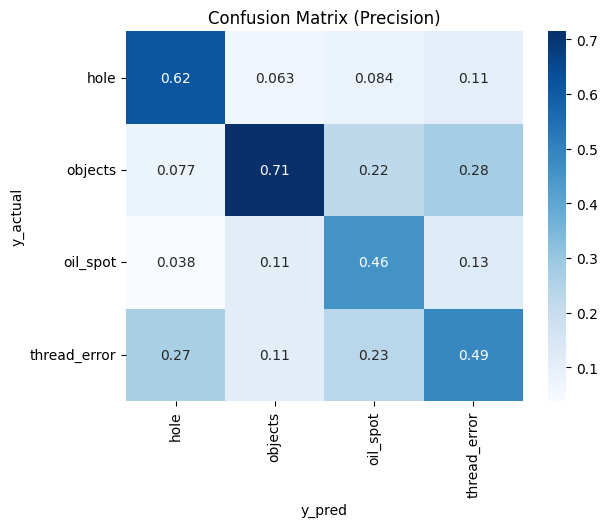


[[0.47058824 0.11764706 0.26470588 0.14705882]
 [0.02380952 0.53571429 0.28571429 0.1547619 ]
 [0.01587302 0.11111111 0.77777778 0.0952381 ]
 [0.11290323 0.11290323 0.40322581 0.37096774]]
sum of diagonal = 2.155048040721665


NEW MODEL
kernel dim = 3x3 number kernels = 6, 7x7 number kernels = 12
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 536,768 (2.05 MB)

 Trainable params: 536,320 (2.05 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 68s 415ms/step - accuracy: 0.2820 - loss: 1.4313e-04 - val_accuracy: 0.2433 - val_loss: 1.6175
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 66s 410ms/step - accuracy: 0.3460 - loss: 1.3062e-04 - val_accuracy: 0.2257 - val_loss: 2.1162
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 407ms/step - accuracy: 0.4071 - loss: 1.2219e-04 - val_accuracy: 0.2628 - val_loss: 2.2773
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 409ms/step - accuracy: 0.4812 - loss: 1.1100e-04 - val_accuracy: 0.2645 - val_loss: 2.4746
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 405ms/step - accuracy: 0.5701 - loss: 9.6119e-05 - val_accuracy: 0.2421 - val_loss: 2.5486
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 405ms/step - accuracy: 0.6894 - loss: 7.4857e-05 - val_accuracy: 0.2902 - val_loss: 2.9930
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 65s 405ms/step - accuracy: 0.8075 - loss: 5.0995e-05 - val_accuracy: 0.3139 - val_loss: 3.1123
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 1,609,410 (6.14 MB)

 Trainable params: 536,320 (2.05 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,072,642 (4.09 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Finished predicting X with eval data set.

[[450 150  60 360]
 [ 36 660 204  96]
 [  0 192 496 336]
 [ 68 153 238 595]]
sum of diagonal = 2201


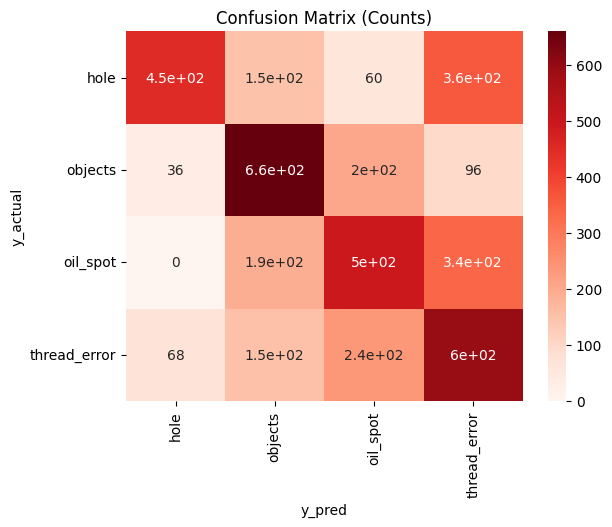


[[0.10991695 0.03663898 0.01465559 0.08793356]
 [0.00879336 0.16121153 0.04982902 0.02344895]
 [0.         0.0468979  0.12115291 0.08207132]
 [0.01660967 0.03737176 0.05813385 0.14533464]]
sum of diagonal = 0.5376160234489498


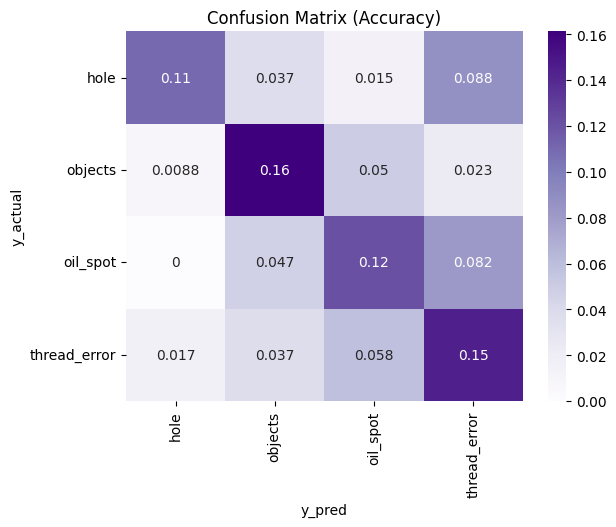


[[0.81227437 0.12987013 0.06012024 0.25955299]
 [0.06498195 0.57142857 0.20440882 0.06921413]
 [0.         0.16623377 0.49699399 0.24224946]
 [0.12274368 0.13246753 0.23847695 0.42898342]]
sum of diagonal = 2.309680345083299



[[0.44117647 0.14705882 0.05882353 0.35294118]
 [0.03614458 0.6626506  0.20481928 0.09638554]
 [0.         0.1875     0.484375   0.328125  ]
 [0.06451613 0.14516129 0.22580645 0.56451613]]
sum of diagonal = 2.152718202030132


kernel dim = 3x3 number filter = 6, 7x7 number filter = 12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Finished predicting X.

[[12  5  4 13]
 [ 1 53 17 13]
 [ 1 18 30 14]
 [ 6  7 18 31]]
sum of diagonal = 126


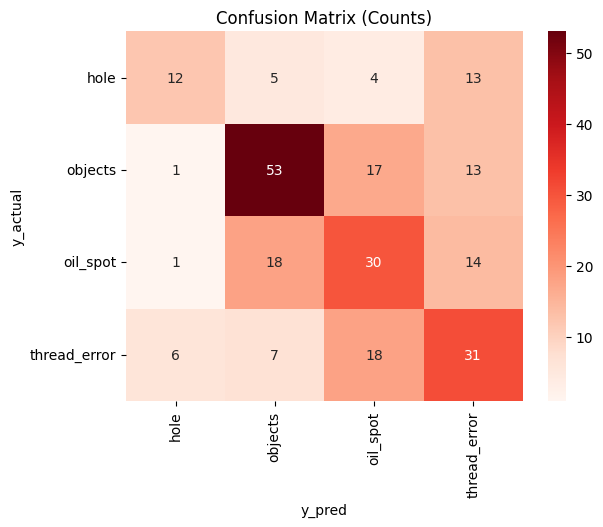


[[0.04938272 0.02057613 0.01646091 0.05349794]
 [0.00411523 0.218107   0.06995885 0.05349794]
 [0.00411523 0.07407407 0.12345679 0.05761317]
 [0.02469136 0.02880658 0.07407407 0.12757202]]
sum of diagonal = 0.5185185185185185



[[0.6        0.06024096 0.05797101 0.18309859]
 [0.05       0.63855422 0.24637681 0.18309859]
 [0.05       0.21686747 0.43478261 0.1971831 ]
 [0.3        0.08433735 0.26086957 0.43661972]]
sum of diagonal = 2.1099565438729813


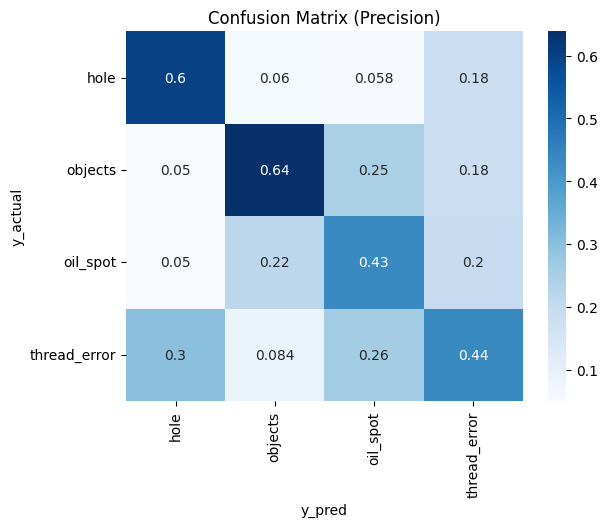


[[0.35294118 0.14705882 0.11764706 0.38235294]
 [0.01190476 0.63095238 0.20238095 0.1547619 ]
 [0.01587302 0.28571429 0.47619048 0.22222222]
 [0.09677419 0.11290323 0.29032258 0.5       ]]
sum of diagonal = 1.9600840336134455


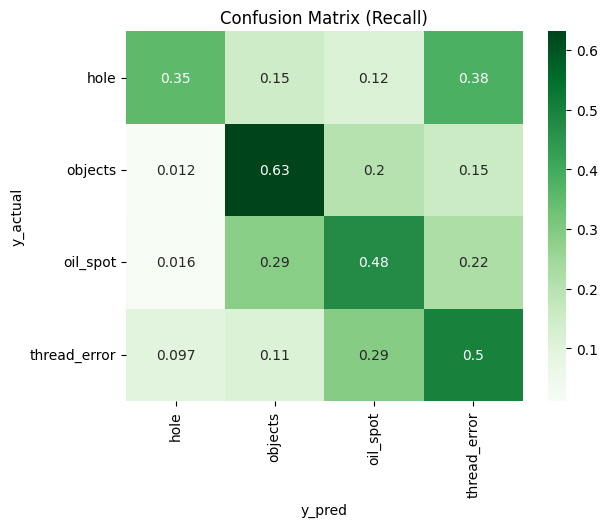

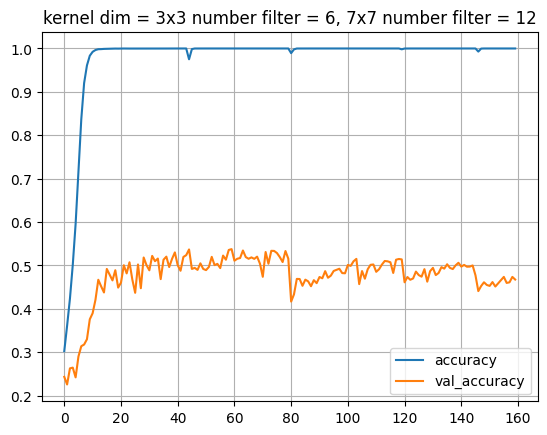

NEW MODEL
kernel dim = 3x3 number kernels = 6, 7x7 number kernels = 14
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 613,560 (2.34 MB)

 Trainable params: 613,112 (2.34 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 85s 525ms/step - accuracy: 0.2842 - loss: 1.4600e-04 - val_accuracy: 0.2501 - val_loss: 1.4979
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 522ms/step - accuracy: 0.3545 - loss: 1.2800e-04 - val_accuracy: 0.2509 - val_loss: 1.7896
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 519ms/step - accuracy: 0.4087 - loss: 1.2126e-04 - val_accuracy: 0.2892 - val_loss: 2.2260
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 519ms/step - accuracy: 0.4672 - loss: 1.1452e-04 - val_accuracy: 0.3095 - val_loss: 2.0820
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 521ms/step - accuracy: 0.5201 - loss: 1.0610e-04 - val_accuracy: 0.3185 - val_loss: 2.0426
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 84s 522ms/step - accuracy: 0.5999 - loss: 9.1055e-05 - val_accuracy: 0.3537 - val_loss: 1.8172
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 83s 521ms/step - accuracy: 0.6770 - loss: 7.5839e-05 - val_accuracy: 0.4228 - val_loss: 1.5628
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 1,839,786 (7.02 MB)

 Trainable params: 613,112 (2.34 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,226,226 (4.68 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Finished predicting X with eval data set.

[[540 120 150 210]
 [ 36 636 120 204]
 [ 64 128 544 288]
 [136 153 102 663]]
sum of diagonal = 2383


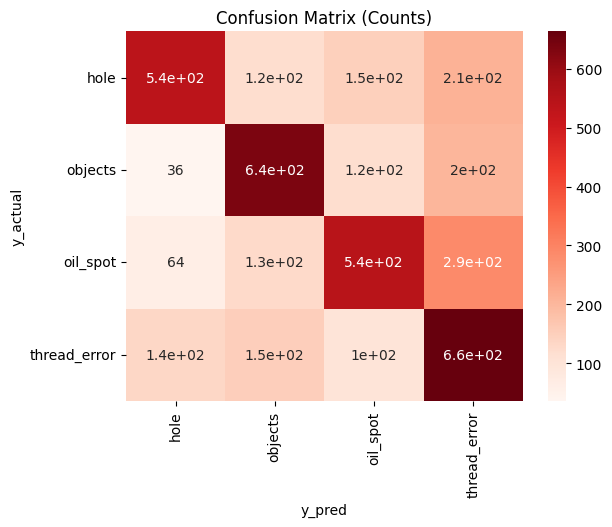


[[0.13190034 0.02931119 0.03663898 0.05129458]
 [0.00879336 0.15534929 0.02931119 0.04982902]
 [0.01563263 0.03126527 0.13287738 0.07034685]
 [0.03321935 0.03737176 0.02491451 0.16194431]]
sum of diagonal = 0.5820713238886175


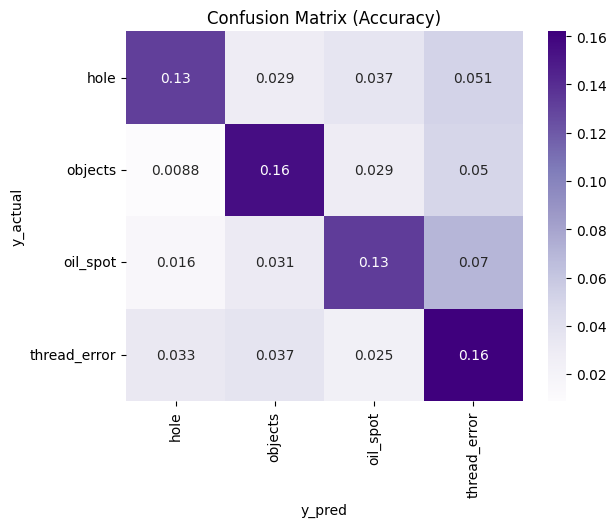


[[0.69587629 0.11571842 0.16375546 0.15384615]
 [0.04639175 0.61330762 0.13100437 0.14945055]
 [0.08247423 0.12343298 0.59388646 0.21098901]
 [0.17525773 0.14754098 0.11135371 0.48571429]]
sum of diagonal = 2.3887846553853946


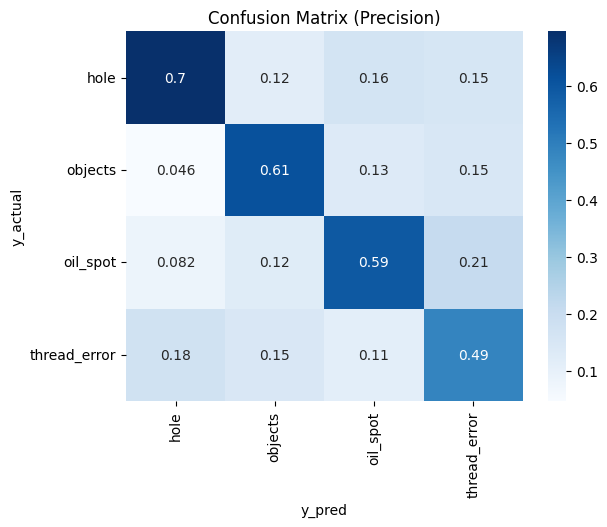


[[0.52941176 0.11764706 0.14705882 0.20588235]
 [0.03614458 0.63855422 0.12048193 0.20481928]
 [0.0625     0.125      0.53125    0.28125   ]
 [0.12903226 0.14516129 0.09677419 0.62903226]]
sum of diagonal = 2.328248239637868


kernel dim = 3x3 number filter = 6, 7x7 number filter = 14
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Finished predicting X.

[[18  1  7  8]
 [ 3 51 11 19]
 [ 4  9 38 12]
 [12  7  7 36]]
sum of diagonal = 143


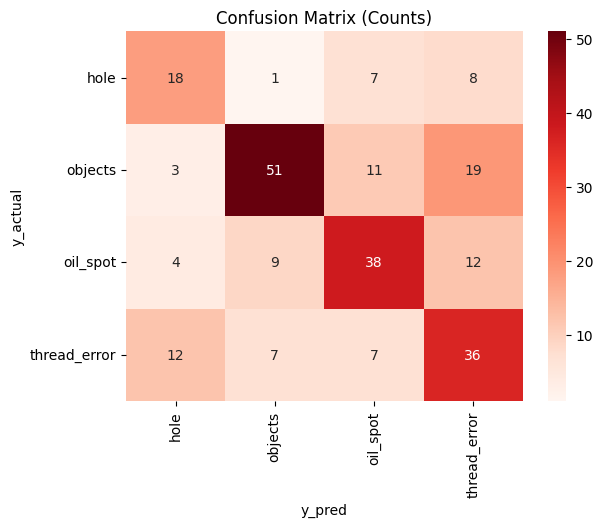


[[0.07407407 0.00411523 0.02880658 0.03292181]
 [0.01234568 0.20987654 0.04526749 0.0781893 ]
 [0.01646091 0.03703704 0.1563786  0.04938272]
 [0.04938272 0.02880658 0.02880658 0.14814815]]
sum of diagonal = 0.588477366255144



[[0.48648649 0.01470588 0.11111111 0.10666667]
 [0.08108108 0.75       0.17460317 0.25333333]
 [0.10810811 0.13235294 0.6031746  0.16      ]
 [0.32432432 0.10294118 0.11111111 0.48      ]]
sum of diagonal = 2.3196610896610896


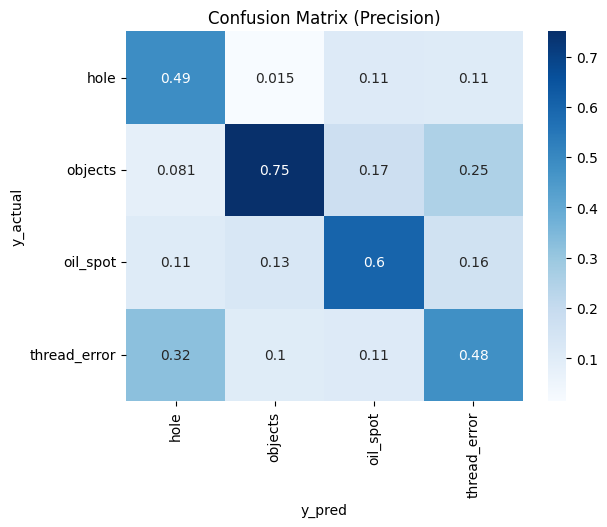


[[0.52941176 0.02941176 0.20588235 0.23529412]
 [0.03571429 0.60714286 0.13095238 0.22619048]
 [0.06349206 0.14285714 0.6031746  0.19047619]
 [0.19354839 0.11290323 0.11290323 0.58064516]]
sum of diagonal = 2.320374386313665


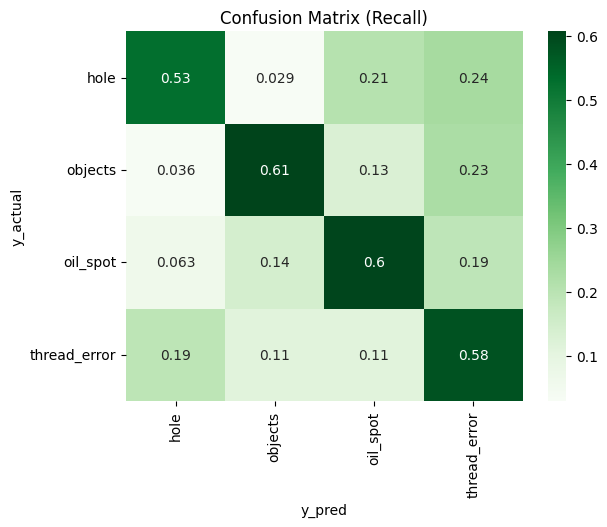

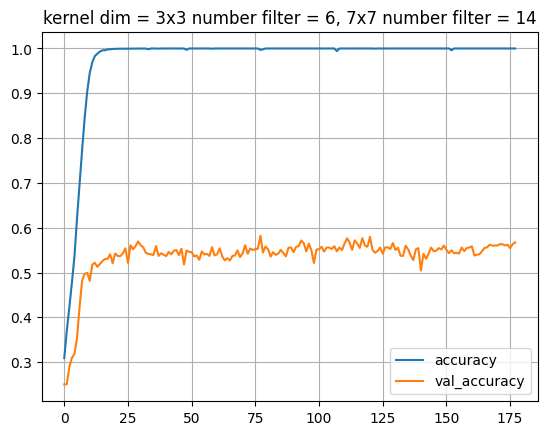

In [11]:
for num_filters_size_3 in [2, 4, 6]:
    for num_filters_size_7 in [12, 14]:
    
        dim = [3, 7]
        nums_filters = [num_filters_size_3, num_filters_size_7]
        print('NEW MODEL')
        print(f'kernel dim = 3x3 number kernels = {num_filters_size_3}, 7x7 number kernels = {num_filters_size_7}')
        image_model = CNN_model(kernel_dims = dim, dropout=0.1,  nums_filters = nums_filters, patience = 100, lr = 0.0001, num_classes = 4)
        history, image_learner = image_model.fit( features_train_defect_array, labels_defect_train, 
                                                 features_eval_defect_array, labels_defect_eval, label_dict, batch_size = 256,
                                                 verbose = 'auto', class_weight=class_weights)
        
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array, labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        with gzip.open(f"../data/models/defect_identification/DefID_y_prob_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models//defect_identification/DefID_image_learner_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/DefID_history_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(history, f)


NEW MODEL
kernel dim = 3x3 number kernels = 2, 7x7 number kernels = 16
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 588,928 (2.25 MB)

 Trainable params: 588,480 (2.24 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 552ms/step - accuracy: 0.2946 - loss: 1.3935e-04 - val_accuracy: 0.2286 - val_loss: 1.8144
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 547ms/step - accuracy: 0.3551 - loss: 1.2852e-04 - val_accuracy: 0.2433 - val_loss: 2.8780
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 87s 545ms/step - accuracy: 0.4020 - loss: 1.2284e-04 - val_accuracy: 0.2731 - val_loss: 2.6796
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 87s 545ms/step - accuracy: 0.4654 - loss: 1.1372e-04 - val_accuracy: 0.2680 - val_loss: 2.5121
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 547ms/step - accuracy: 0.5255 - loss: 1.0431e-04 - val_accuracy: 0.2702 - val_loss: 2.4086
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 548ms/step - accuracy: 0.5915 - loss: 9.2487e-05 - val_accuracy: 0.2460 - val_loss: 2.5963
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 547ms/step - accuracy: 0.7000 - loss: 7.2345e-05 - val_accuracy: 0.2677 - val_loss: 2.7381
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 2) │         20 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 2) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 2) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 2) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 4) │         76 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 4) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 1,765,890 (6.74 MB)

 Trainable params: 588,480 (2.24 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,176,962 (4.49 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Finished predicting X with eval data set.

[[450 240 240  90]
 [ 12 804 156  24]
 [  0 192 768  64]
 [ 51 238 221 544]]
sum of diagonal = 2566



[[0.10991695 0.05862237 0.05862237 0.02198339]
 [0.00293112 0.19638495 0.03810454 0.00586224]
 [0.         0.0468979  0.1875916  0.01563263]
 [0.01245725 0.05813385 0.05398144 0.13287738]]
sum of diagonal = 0.626770884220811


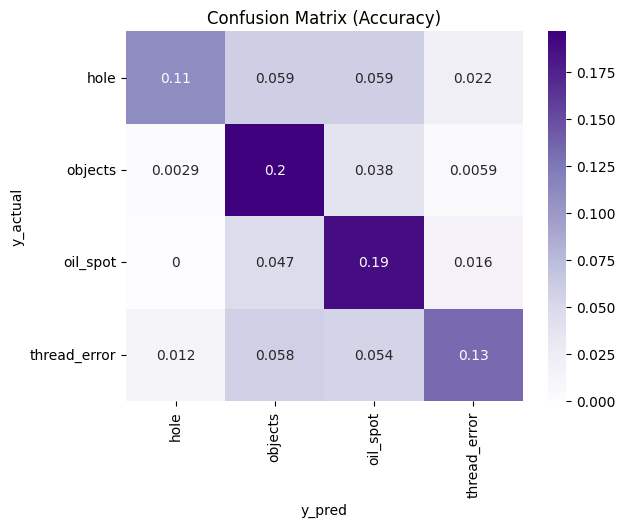


[[0.87719298 0.16282225 0.1732852  0.12465374]
 [0.02339181 0.54545455 0.11263538 0.033241  ]
 [0.         0.1302578  0.55451264 0.08864266]
 [0.0994152  0.1614654  0.15956679 0.7534626 ]]
sum of diagonal = 2.7306227671678633


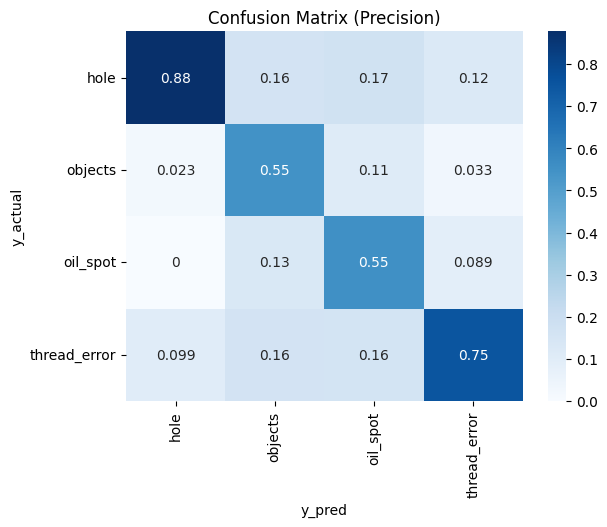


[[0.44117647 0.23529412 0.23529412 0.08823529]
 [0.01204819 0.80722892 0.15662651 0.02409639]
 [0.         0.1875     0.75       0.0625    ]
 [0.0483871  0.22580645 0.20967742 0.51612903]]
sum of diagonal = 2.5145344185089504


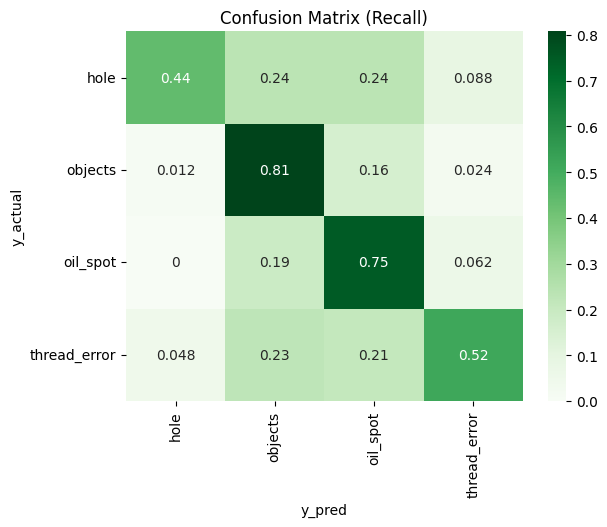

kernel dim = 3x3 number filter = 2, 7x7 number filter = 16
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Finished predicting X.

[[11  9  6  8]
 [ 1 68 13  2]
 [ 0  8 51  4]
 [ 4 23 11 24]]
sum of diagonal = 154


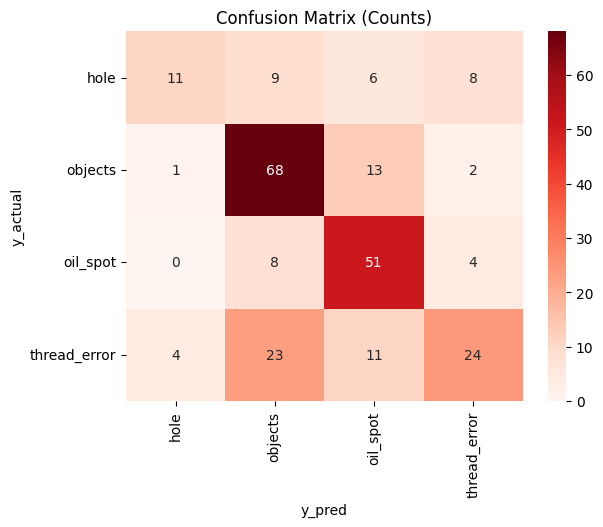


[[0.04526749 0.03703704 0.02469136 0.03292181]
 [0.00411523 0.27983539 0.05349794 0.00823045]
 [0.         0.03292181 0.20987654 0.01646091]
 [0.01646091 0.09465021 0.04526749 0.09876543]]
sum of diagonal = 0.6337448559670782


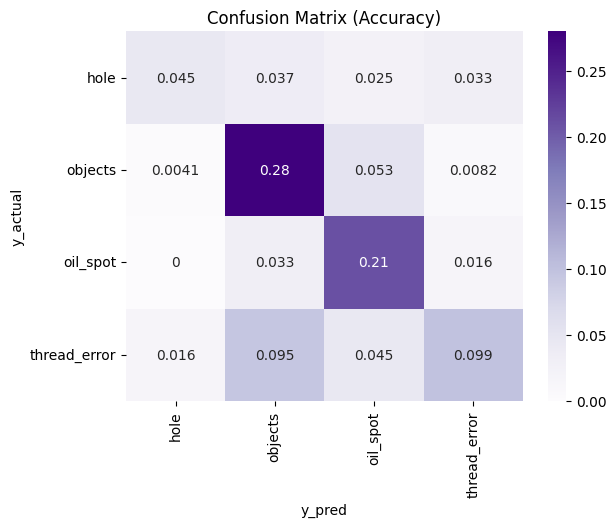


[[0.6875     0.08333333 0.07407407 0.21052632]
 [0.0625     0.62962963 0.16049383 0.05263158]
 [0.         0.07407407 0.62962963 0.10526316]
 [0.25       0.21296296 0.13580247 0.63157895]]
sum of diagonal = 2.5783382066276808



[[0.32352941 0.26470588 0.17647059 0.23529412]
 [0.01190476 0.80952381 0.1547619  0.02380952]
 [0.         0.12698413 0.80952381 0.06349206]
 [0.06451613 0.37096774 0.17741935 0.38709677]]
sum of diagonal = 2.329673805005873


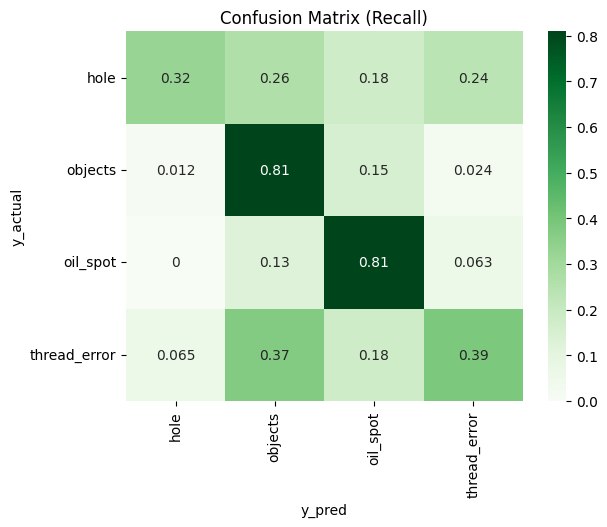

NEW MODEL
kernel dim = 3x3 number kernels = 4, 7x7 number kernels = 16
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 641,240 (2.45 MB)

 Trainable params: 640,792 (2.44 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 577ms/step - accuracy: 0.2979 - loss: 1.4161e-04 - val_accuracy: 0.2433 - val_loss: 2.5268
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 577ms/step - accuracy: 0.3913 - loss: 1.2472e-04 - val_accuracy: 0.2433 - val_loss: 3.9713
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 579ms/step - accuracy: 0.4891 - loss: 1.1120e-04 - val_accuracy: 0.2477 - val_loss: 3.7385
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 578ms/step - accuracy: 0.5668 - loss: 9.8340e-05 - val_accuracy: 0.2325 - val_loss: 2.9060
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 575ms/step - accuracy: 0.6515 - loss: 8.2869e-05 - val_accuracy: 0.2545 - val_loss: 2.5545
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 92s 575ms/step - accuracy: 0.7604 - loss: 6.1025e-05 - val_accuracy: 0.2653 - val_loss: 3.2970
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 579ms/step - accuracy: 0.8671 - loss: 3.7648e-05 - val_accuracy: 0.3280 - val_loss: 3.4092
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 1,922,826 (7.34 MB)

 Trainable params: 640,792 (2.44 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,281,586 (4.89 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Finished predicting X with eval data set.

[[180 510  90 240]
 [ 12 816 156  12]
 [  0 352 496 176]
 [ 51 425 221 357]]
sum of diagonal = 1849



[[0.04396678 0.12457255 0.02198339 0.05862237]
 [0.00293112 0.19931607 0.03810454 0.00293112]
 [0.         0.08597948 0.12115291 0.04298974]
 [0.01245725 0.10381045 0.05398144 0.08720078]]
sum of diagonal = 0.4516365412799218


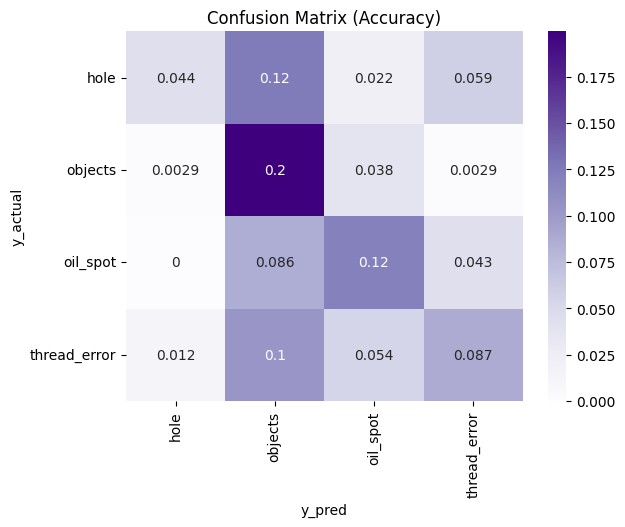


[[0.74074074 0.2425107  0.09345794 0.30573248]
 [0.04938272 0.38801712 0.16199377 0.01528662]
 [0.         0.16737993 0.51505711 0.22420382]
 [0.20987654 0.20209225 0.22949117 0.45477707]]
sum of diagonal = 2.098592042394672


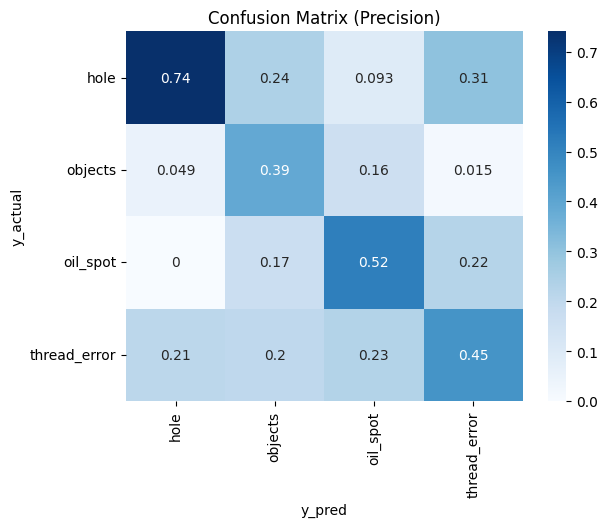


[[0.17647059 0.5        0.08823529 0.23529412]
 [0.01204819 0.81927711 0.15662651 0.01204819]
 [0.         0.34375    0.484375   0.171875  ]
 [0.0483871  0.40322581 0.20967742 0.33870968]]
sum of diagonal = 1.8188323740883838


kernel dim = 3x3 number filter = 4, 7x7 number filter = 16
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Finished predicting X.

[[10 13  3  8]
 [ 0 69 10  5]
 [ 0 32 23  8]
 [ 1 21 19 21]]
sum of diagonal = 123



[[0.04115226 0.05349794 0.01234568 0.03292181]
 [0.         0.28395062 0.04115226 0.02057613]
 [0.         0.13168724 0.09465021 0.03292181]
 [0.00411523 0.08641975 0.0781893  0.08641975]]
sum of diagonal = 0.5061728395061729



[[0.90909091 0.0962963  0.05454545 0.19047619]
 [0.         0.51111111 0.18181818 0.11904762]
 [0.         0.23703704 0.41818182 0.19047619]
 [0.09090909 0.15555556 0.34545455 0.5       ]]
sum of diagonal = 2.3383838383838382


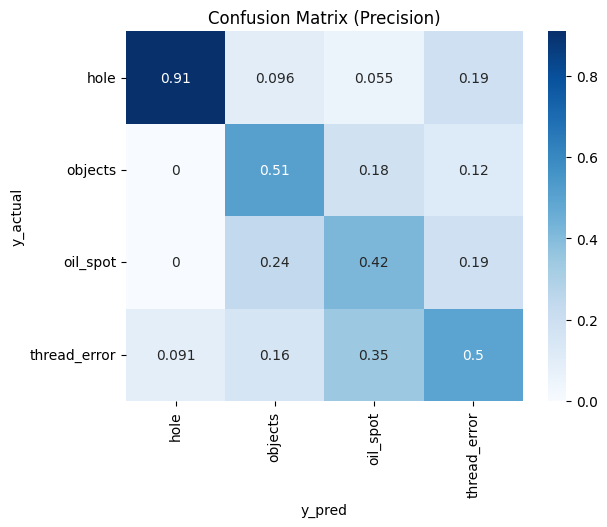


[[0.29411765 0.38235294 0.08823529 0.23529412]
 [0.         0.82142857 0.11904762 0.05952381]
 [0.         0.50793651 0.36507937 0.12698413]
 [0.01612903 0.33870968 0.30645161 0.33870968]]
sum of diagonal = 1.8193352609861149


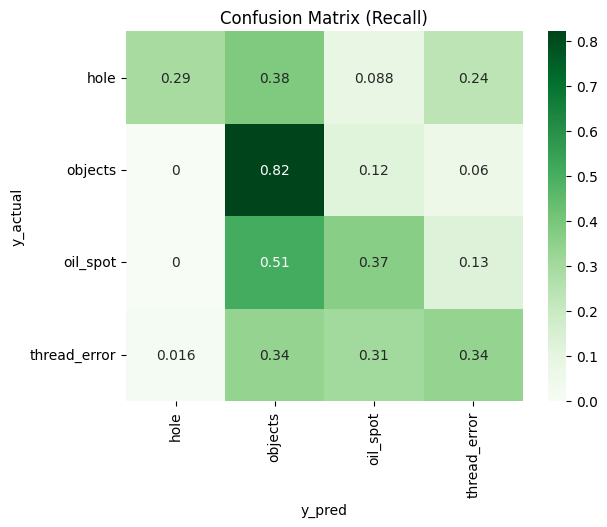

NEW MODEL
kernel dim = 3x3 number kernels = 6, 7x7 number kernels = 16
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 694,272 (2.65 MB)

 Trainable params: 693,824 (2.65 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 99s 610ms/step - accuracy: 0.2744 - loss: 1.4501e-04 - val_accuracy: 0.2433 - val_loss: 2.9681
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 608ms/step - accuracy: 0.3260 - loss: 1.3314e-04 - val_accuracy: 0.2433 - val_loss: 5.8812
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 606ms/step - accuracy: 0.3539 - loss: 1.2857e-04 - val_accuracy: 0.2433 - val_loss: 5.4052
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 606ms/step - accuracy: 0.3820 - loss: 1.2513e-04 - val_accuracy: 0.2433 - val_loss: 4.8736
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 604ms/step - accuracy: 0.4413 - loss: 1.1841e-04 - val_accuracy: 0.2433 - val_loss: 4.4760
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 98s 610ms/step - accuracy: 0.5294 - loss: 1.0540e-04 - val_accuracy: 0.2433 - val_loss: 4.1554
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 609ms/step - accuracy: 0.6665 - loss: 7.9425e-05 - val_accuracy: 0.2648 - val_loss: 3.8653
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 6) │         60 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 6) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 6) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 6) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │        660 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 2,081,922 (7.94 MB)

 Trainable params: 693,824 (2.65 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,387,650 (5.29 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Finished predicting X with eval data set.

[[420 180  90 330]
 [ 12 804 132  48]
 [ 16 224 576 208]
 [ 34 255 221 544]]
sum of diagonal = 2344


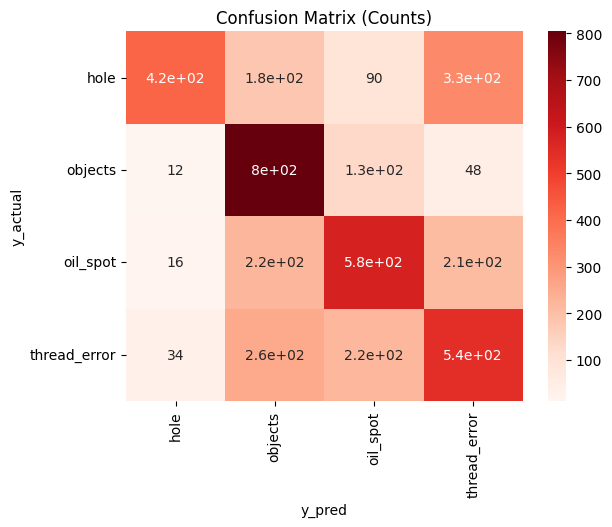


[[0.10258915 0.04396678 0.02198339 0.08060576]
 [0.00293112 0.19638495 0.03224231 0.01172447]
 [0.00390816 0.05471422 0.1406937  0.05080606]
 [0.00830484 0.06228627 0.05398144 0.13287738]]
sum of diagonal = 0.5725451880801172



[[0.87136929 0.12303486 0.08832188 0.2920354 ]
 [0.02489627 0.54955571 0.12953876 0.04247788]
 [0.03319502 0.15311005 0.56526006 0.1840708 ]
 [0.07053942 0.17429938 0.21687929 0.48141593]]
sum of diagonal = 2.467600990141049


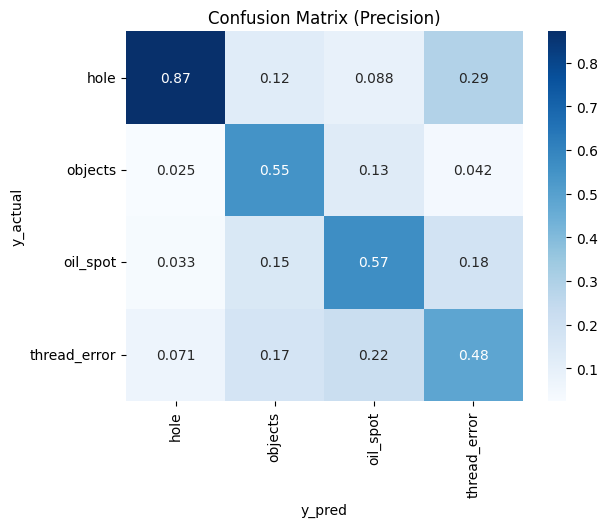


[[0.41176471 0.17647059 0.08823529 0.32352941]
 [0.01204819 0.80722892 0.13253012 0.04819277]
 [0.015625   0.21875    0.5625     0.203125  ]
 [0.03225806 0.24193548 0.20967742 0.51612903]]
sum of diagonal = 2.297622653803068


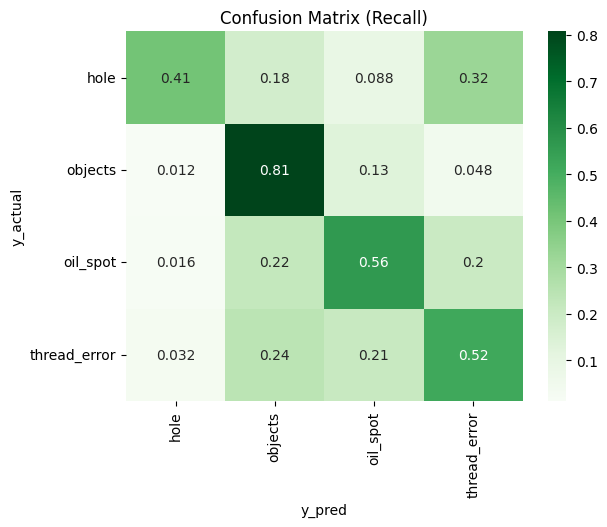

kernel dim = 3x3 number filter = 6, 7x7 number filter = 16
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Finished predicting X.

[[14  9  3  8]
 [ 1 65 13  5]
 [ 0 21 29 13]
 [ 2 16 12 32]]
sum of diagonal = 140


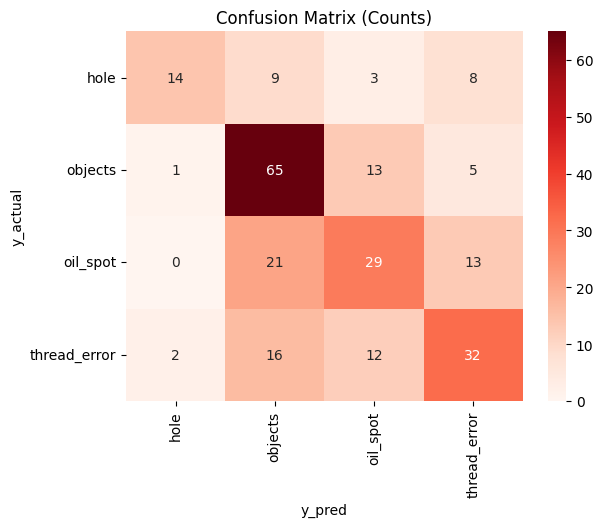


[[0.05761317 0.03703704 0.01234568 0.03292181]
 [0.00411523 0.26748971 0.05349794 0.02057613]
 [0.         0.08641975 0.11934156 0.05349794]
 [0.00823045 0.06584362 0.04938272 0.13168724]]
sum of diagonal = 0.5761316872427984


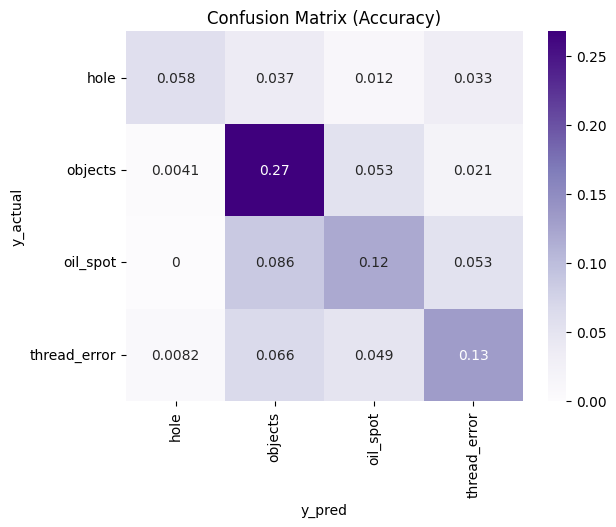


[[0.82352941 0.08108108 0.05263158 0.13793103]
 [0.05882353 0.58558559 0.22807018 0.0862069 ]
 [0.         0.18918919 0.50877193 0.22413793]
 [0.11764706 0.14414414 0.21052632 0.55172414]]
sum of diagonal = 2.4696110651058873


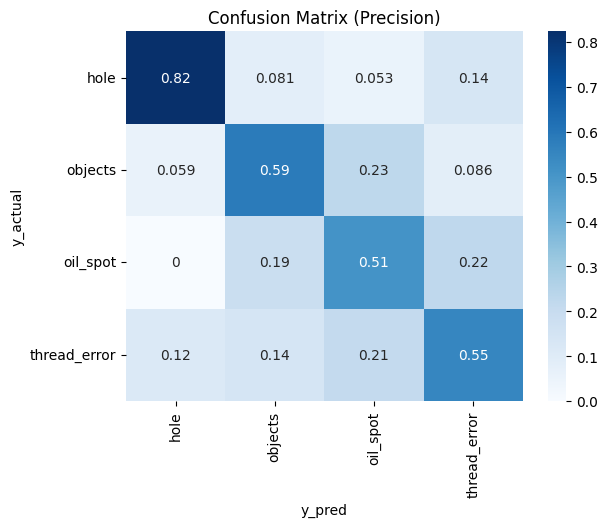


[[0.41176471 0.26470588 0.08823529 0.23529412]
 [0.01190476 0.77380952 0.1547619  0.05952381]
 [0.         0.33333333 0.46031746 0.20634921]
 [0.03225806 0.25806452 0.19354839 0.51612903]]
sum of diagonal = 2.1620207222674015


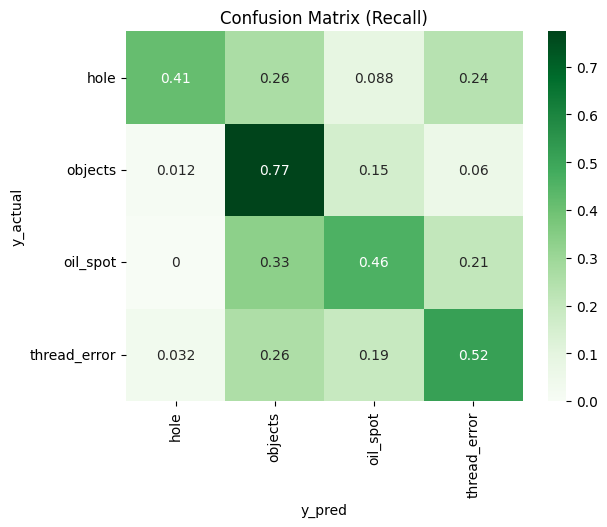

In [12]:
for num_filters_size_3 in [2, 4, 6]:
    for num_filters_size_7 in [16]:
    
        dim = [3, 7]
        nums_filters = [num_filters_size_3, num_filters_size_7]
        print('NEW MODEL')
        print(f'kernel dim = 3x3 number kernels = {num_filters_size_3}, 7x7 number kernels = {num_filters_size_7}')
        image_model = CNN_model(kernel_dims = dim, dropout=0.1,  nums_filters = nums_filters, patience = 100, lr = 0.0001, num_classes = 4)
        history, image_learner = image_model.fit( features_train_defect_array, labels_defect_train, 
                                                 features_eval_defect_array, labels_defect_eval, label_dict, batch_size = 256,
                                                 verbose = 'auto', class_weight=class_weights)
        
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array, labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        with gzip.open(f"../data/models/defect_identification/DefID_y_prob_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models//defect_identification/DefID_image_learner_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/DefID_history_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(history, f)


kernel dim = 3x3 number filter = 2, 7x7 number filter = 16
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Finished predicting X.

[[13  3  4 14]
 [ 4 49 16 15]
 [ 4 13 26 20]
 [ 9  7 11 35]]
sum of diagonal = 123



[[0.05349794 0.01234568 0.01646091 0.05761317]
 [0.01646091 0.20164609 0.06584362 0.0617284 ]
 [0.01646091 0.05349794 0.10699588 0.08230453]
 [0.03703704 0.02880658 0.04526749 0.14403292]]
sum of diagonal = 0.5061728395061729



[[0.43333333 0.04166667 0.07017544 0.16666667]
 [0.13333333 0.68055556 0.28070175 0.17857143]
 [0.13333333 0.18055556 0.45614035 0.23809524]
 [0.3        0.09722222 0.19298246 0.41666667]]
sum of diagonal = 1.9866959064327487



[[0.38235294 0.08823529 0.11764706 0.41176471]
 [0.04761905 0.58333333 0.19047619 0.17857143]
 [0.06349206 0.20634921 0.41269841 0.31746032]
 [0.14516129 0.11290323 0.17741935 0.56451613]]
sum of diagonal = 1.9429008162404746


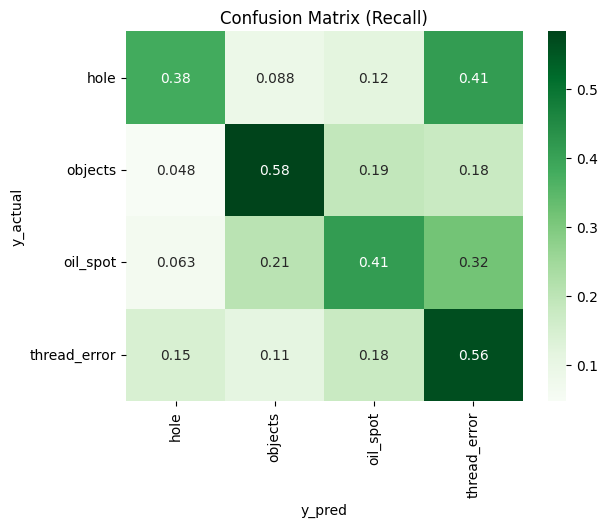

In [10]:
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array, labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        with gzip.open(f"../data/models/defect_identification/DefID_y_prob_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models//defect_identification/DefID_image_learner_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/DefID_history_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(history, f)


NEW MODEL
kernel dim = 3x3 number kernels = 8, 7x7 number kernels = 12
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 8) │         80 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 8) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 8) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      1,168 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 590,520 (2.25 MB)

 Trainable params: 590,072 (2.25 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 473ms/step - accuracy: 0.2806 - loss: 1.4509e-04 - val_accuracy: 0.2433 - val_loss: 1.6694
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 76s 476ms/step - accuracy: 0.3442 - loss: 1.2970e-04 - val_accuracy: 0.2609 - val_loss: 2.5590
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 76s 475ms/step - accuracy: 0.3931 - loss: 1.2362e-04 - val_accuracy: 0.2631 - val_loss: 2.7725
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 76s 474ms/step - accuracy: 0.4433 - loss: 1.1668e-04 - val_accuracy: 0.2543 - val_loss: 2.9101
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 472ms/step - accuracy: 0.5008 - loss: 1.0946e-04 - val_accuracy: 0.2235 - val_loss: 2.8881
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 467ms/step - accuracy: 0.5586 - loss: 9.8761e-05 - val_accuracy: 0.2384 - val_loss: 3.1244
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 76s 476ms/step - accuracy: 0.6420 - loss: 8.2625e-05 - val_accuracy: 0.2594 - val_loss: 3.9793
Epoch 8/100000
160/160

Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 8) │         80 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        600 │ image_input_for   │
│ (Conv2D)            │ 12)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 8) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 8) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 12)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      1,168 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     14,136 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 24)               │            │                 

 Total params: 1,770,666 (6.75 MB)

 Trainable params: 590,072 (2.25 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,180,146 (4.50 MB)

None
Finished fitting.  Predicting X...
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Finished predicting X with eval data set.

[[240 330 150 300]
 [  0 864  48  84]
 [  0 320 544 160]
 [ 68 391 136 459]]
sum of diagonal = 2107



[[0.05862237 0.08060576 0.03663898 0.07327797]
 [0.         0.21104055 0.01172447 0.02051783]
 [0.         0.07816317 0.13287738 0.03908158]
 [0.01660967 0.09550562 0.03321935 0.11211529]]
sum of diagonal = 0.5146555935515388


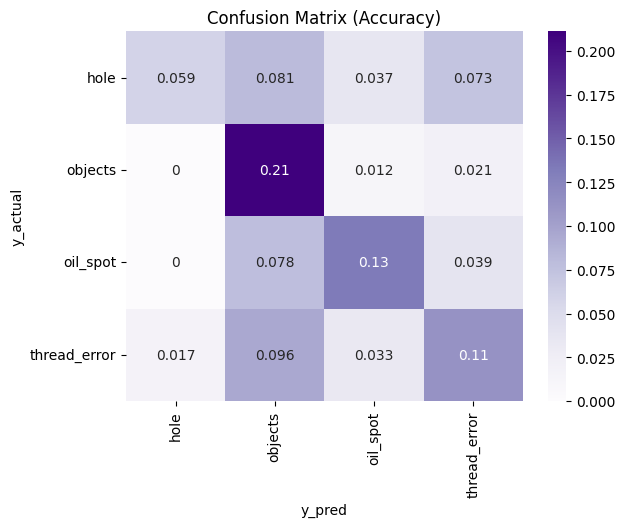


[[0.77922078 0.17322835 0.17084282 0.29910269]
 [0.         0.45354331 0.0546697  0.08374875]
 [0.         0.167979   0.61958998 0.15952144]
 [0.22077922 0.20524934 0.15489749 0.45762712]]
sum of diagonal = 2.309981182172418



[[0.23529412 0.32352941 0.14705882 0.29411765]
 [0.         0.86746988 0.04819277 0.08433735]
 [0.         0.3125     0.53125    0.15625   ]
 [0.06451613 0.37096774 0.12903226 0.43548387]]
sum of diagonal = 2.069497868132873


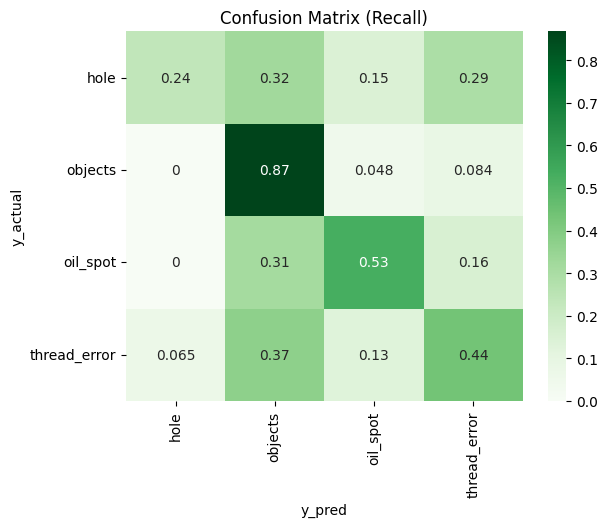

kernel dim = 3x3 number filter = 8, 7x7 number filter = 12
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Finished predicting X.

[[ 9 13  4  8]
 [ 1 74  7  2]
 [ 0 23 27 13]
 [ 6 20 12 24]]
sum of diagonal = 134


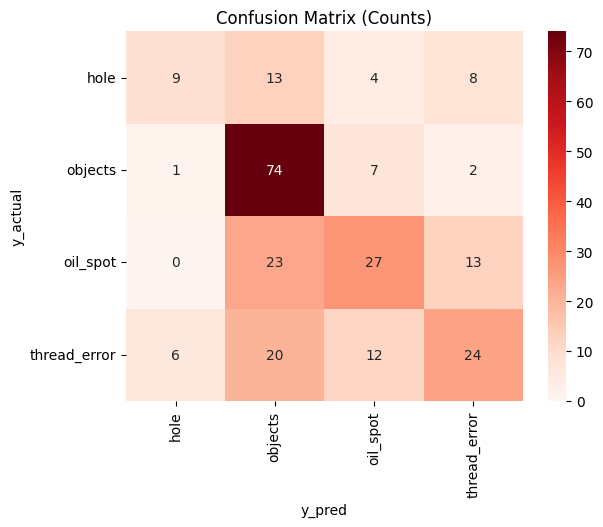


[[0.03703704 0.05349794 0.01646091 0.03292181]
 [0.00411523 0.30452675 0.02880658 0.00823045]
 [0.         0.09465021 0.11111111 0.05349794]
 [0.02469136 0.08230453 0.04938272 0.09876543]]
sum of diagonal = 0.5514403292181069



[[0.5625     0.1        0.08       0.17021277]
 [0.0625     0.56923077 0.14       0.04255319]
 [0.         0.17692308 0.54       0.27659574]
 [0.375      0.15384615 0.24       0.5106383 ]]
sum of diagonal = 2.1823690671031097



[[0.26470588 0.38235294 0.11764706 0.23529412]
 [0.01190476 0.88095238 0.08333333 0.02380952]
 [0.         0.36507937 0.42857143 0.20634921]
 [0.09677419 0.32258065 0.19354839 0.38709677]]
sum of diagonal = 1.961326466070299


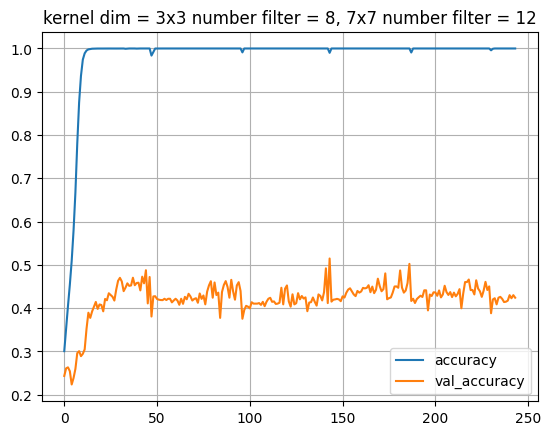

NEW MODEL
kernel dim = 3x3 number kernels = 8, 7x7 number kernels = 14
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 8) │         80 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        700 │ image_input_for   │
│ (Conv2D)            │ 14)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 8) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 8) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 14)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32,    │      1,168 │ maxpool1_3[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     19,236 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 28)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 28)               │            │                 

 Total params: 667,312 (2.55 MB)

 Trainable params: 666,864 (2.54 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 91s 555ms/step - accuracy: 0.2953 - loss: 1.4283e-04 - val_accuracy: 0.2868 - val_loss: 1.4635
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 562ms/step - accuracy: 0.3678 - loss: 1.2753e-04 - val_accuracy: 0.2684 - val_loss: 1.9201
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 564ms/step - accuracy: 0.4138 - loss: 1.2090e-04 - val_accuracy: 0.2362 - val_loss: 2.3621
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 560ms/step - accuracy: 0.4811 - loss: 1.1157e-04 - val_accuracy: 0.2550 - val_loss: 2.5816
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 89s 557ms/step - accuracy: 0.5459 - loss: 1.0068e-04 - val_accuracy: 0.2677 - val_loss: 2.6992
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 561ms/step - accuracy: 0.6420 - loss: 8.2785e-05 - val_accuracy: 0.2848 - val_loss: 2.8738
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 89s 559ms/step - accuracy: 0.7325 - loss: 6.5544e-05 - val_accuracy: 0.2931 - val_loss: 3.2656
Epoch 8/100000
160/160

KeyboardInterrupt: 

In [13]:
for num_filters_size_3 in [8]:
    for num_filters_size_7 in [12, 14, 16]:
    
        dim = [3, 7]
        nums_filters = [num_filters_size_3, num_filters_size_7]
        print('NEW MODEL')
        print(f'kernel dim = 3x3 number kernels = {num_filters_size_3}, 7x7 number kernels = {num_filters_size_7}')
        image_model = CNN_model(kernel_dims = dim, dropout=0.1,  nums_filters = nums_filters, patience = 100, lr = 0.0001, num_classes = 4)
        history, image_learner = image_model.fit( features_train_defect_array, labels_defect_train, 
                                                 features_eval_defect_array, labels_defect_eval, label_dict, batch_size = 256,
                                                 verbose = 'auto', class_weight=class_weights)
        
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array, labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        with gzip.open(f"../data/models/defect_identification/DefID_y_prob_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models//defect_identification/DefID_image_learner_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/DefID_history_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(history, f)

In [14]:
for num_filters_size_3 in [4, 4, 4]:
    for num_filters_size_7 in [16]:
    
        dim = [3, 7]
        nums_filters = [num_filters_size_3, num_filters_size_7]
        print('NEW MODEL')
        print(f'kernel dim = 3x3 number kernels = {num_filters_size_3}, 7x7 number kernels = {num_filters_size_7}')
        image_model = CNN_model(kernel_dims = dim, dropout=0.1,  nums_filters = nums_filters, patience = 100, lr = 0.0001, num_classes = 4)
        history, image_learner = image_model.fit( features_train_defect_array, labels_defect_train, 
                                                 features_eval_defect_array, labels_defect_eval, label_dict, batch_size = 256,
                                                 verbose = 'auto', class_weight=class_weights)
        
        print(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        y_predict, y_prob = image_model.predict(features_test_defect_array, labels_defect_test,)
        plt.title(f'kernel dim = 3x3 number filter = {num_filters_size_3}, 7x7 number filter = {num_filters_size_7}')
        metric = 'accuracy'
        plt.plot(history.history[metric], label = metric)
        metric = 'val_accuracy'
        plt.plot(history.history[metric], label = metric)
        plt.legend()
        plt.grid()
        plt.show()
        with gzip.open(f"../data/models/defect_identification/DefID_y_prob_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(y_prob, f)
        with gzip.open(f"../data/models//defect_identification/DefID_image_learner_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(image_learner, f)
        with gzip.open(f"../data/models/defect_identification/DefID_history_{str(dim)}_{str(nums_filters)}_2d.pckl", 'wb') as f:
            pickle.dump(history, f)

NEW MODEL
kernel dim = 3x3 number kernels = 4, 7x7 number kernels = 16
self.kernel_dims = [3, 7]
self.dropout = 0.1


Model: "image_learner"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _3x3_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input_for     │ (None, 64, 64, 1) │          0 │ -                 │
│ _7x7_kernel_subnet… │                   │            │                   │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_3         │ (None, 64, 64, 4) │         40 │ image_input_for   │
│ (Conv2D)            │                   │            │ _3x3_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter1_7         │ (None, 64, 64,    │        800 │ image_input_for   │
│ (Conv2D)            │ 16)               │            │ _7x7_kernel_subn… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64, 4) │        256 │ 2dfilter1_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 64, 64,    │        256 │ 2dfilter1_7[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_3          │ (None, 64, 64, 4) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1_7          │ (None, 64, 64,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_3          │ (None, 32, 32, 4) │          0 │ dropout1_3[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool1_7          │ (None, 32, 32,    │          0 │ dropout1_7[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_3         │ (None, 32, 32, 8) │        296 │ maxpool1_3[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2dfilter2_7         │ (None, 32, 32,    │     25,120 │ maxpool1_7[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32, 8) │        128 │ 2dfilter2_3[0][0] │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batchnormalization… │ (None, 32, 32,    │        128 │ 2dfilter2_7[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_3          │ (None, 32, 32, 8) │          0 │ batchnormalizati… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2_7          │ (None, 32, 32,    │          0 │ batchnormalizati… │
│ (Dropout)           │ 32)               │            │                 

 Total params: 641,240 (2.45 MB)

 Trainable params: 640,792 (2.44 MB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 97s 594ms/step - accuracy: 0.2792 - loss: 1.5315e-04 - val_accuracy: 0.2474 - val_loss: 1.7862
Epoch 2/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 98s 614ms/step - accuracy: 0.3499 - loss: 1.3066e-04 - val_accuracy: 0.2570 - val_loss: 2.7529
Epoch 3/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 586ms/step - accuracy: 0.4036 - loss: 1.2308e-04 - val_accuracy: 0.2645 - val_loss: 3.1492
Epoch 4/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 94s 585ms/step - accuracy: 0.4825 - loss: 1.1188e-04 - val_accuracy: 0.2992 - val_loss: 2.9110
Epoch 5/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 584ms/step - accuracy: 0.5659 - loss: 9.7155e-05 - val_accuracy: 0.3092 - val_loss: 3.1284
Epoch 6/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 581ms/step - accuracy: 0.7143 - loss: 6.8525e-05 - val_accuracy: 0.2943 - val_loss: 3.3774
Epoch 7/100000
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 583ms/step - accuracy: 0.8551 - loss: 3.9036e-05 - val_accuracy: 0.3043 - val_loss: 3.3649
Epoch 8/100000
160/160

KeyboardInterrupt: 